# Rips Optimization

In [1]:
import time
import torch
import torch.nn as nn
import torch_tda
import numpy as np
import matplotlib.pyplot as plt
import bats
from tqdm import tqdm

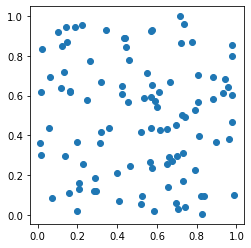

In [7]:
n = 100
np.random.seed(0)
data = np.random.uniform(0,1,(n,2))
fig1 = plt.scatter(data[:,0], data[:,1])
fig1.axes.set_aspect('equal')
X = torch.tensor(data, requires_grad=True)

In [8]:
# Compute H1 and H0
# maximum homology dimension is 1, which implies C_2 needed
# flags = (bats.standard_reduction_flag(), bats.compute_basis_flag())
flags = (bats.standard_reduction_flag(),bats.compression_flag())
# flags = ()
layer = torch_tda.nn.RipsLayer(maxdim = 1, reduction_flags=flags) 
# dgms = layer(X) # run FlagDiagram.forward()

In [9]:
f1 = torch_tda.nn.BarcodePolyFeature(1,2,0)

In [10]:
optimizer = torch.optim.Adam([X], lr=1e-2)
for i in tqdm(range(100)):
    optimizer.zero_grad()
    dgms = layer(X)
    loss = -f1(dgms) 
    loss.backward()
    optimizer.step()

100%|██████████| 100/100 [00:22<00:00,  4.49it/s]


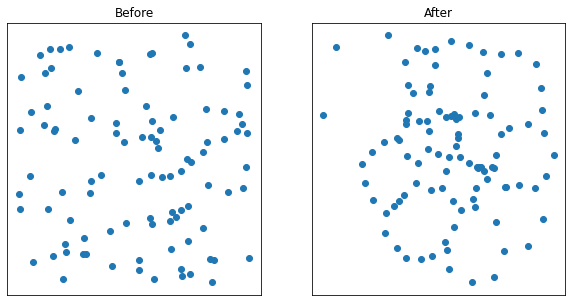

In [11]:
# save figure
y = X.detach().numpy()
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].scatter(data[:,0], data[:,1])
ax[0].set_title("Before")
ax[1].scatter(y[:,0], y[:,1])
ax[1].set_title("After")
for i in range(2):
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].tick_params(bottom=False, left=False)
plt.savefig('holes.png')